In [422]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from random import randint

In [423]:
#from matplotlib.colors import ListedColormap

In [424]:
from sklearn.model_selection import train_test_split

In [425]:
import cv2

In [426]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])

        self.cost_ = []
        
        for i in  range(self.n_iter ):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        #return 1.0 / (1.0 + np.exp(- X ))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [427]:
# Учим просто понимать можно поставить на текущую позицию в линии или нельзя

X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1], 
    
     
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    [-1,-1,-1],
])

X = np.where(X==-1, 2, X)
X = np.where(X==0, -1, X)

y1 =  np.array([1,1,1,1, -1,-1,-1,-1,  1,1,1,-1,-1,-1,-1])

y2 = np.array([1,1, -1,-1, 1,1, -1,-1, 1, -1,-1, 1,1, -1,-1])

y3 = np.array([1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1])



<IPython.core.display.Javascript object>


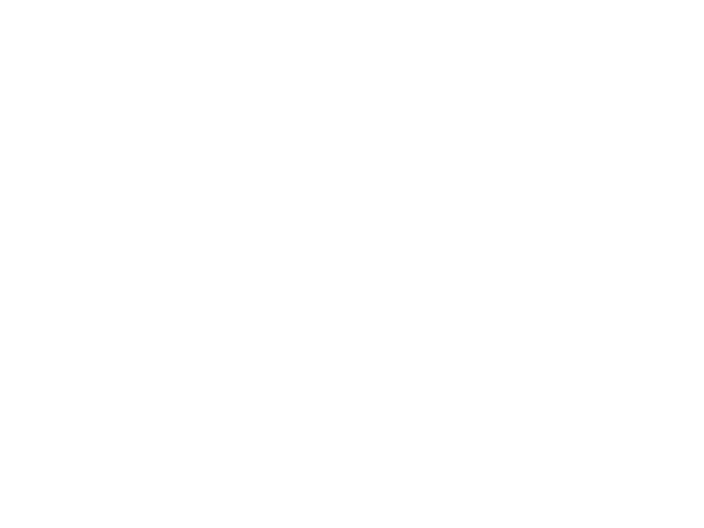

In [428]:
%matplotlib notebook
x1 = X[y1 == 1]
x2 = X[y1 == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [429]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y1, test_size=0.2, random_state = 1, stratify=y1
)


In [430]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2, test_size=0.2, random_state = 1, stratify=y2
)


In [431]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y3, test_size=0.2, random_state = 1, stratify=y3
)


In [432]:
ada1 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada2 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)
ada3 = AdaLineGD( eta=0.01, n_iter=30, random_state=1)

In [433]:
ada1.fit(X_train1, y_train1)
plt.plot(range(1 , len(ada1.cost_) + 1 ), ada1.cost_, marker='o')
plt.show()

In [434]:
ada2.fit(X_train2, y_train2)
plt.plot(range(1 , len(ada2.cost_) + 1 ), ada2.cost_, marker='o')
plt.show()

In [435]:
ada3.fit(X_train3, y_train3)
plt.plot(range(1 , len(ada3.cost_) + 1 ), ada3.cost_, marker='o')
plt.show()

In [436]:
ada1.predict([1,2,0])

array(-1)

In [437]:
ada2.predict([4,0,4])

array(1)

In [438]:
ada3.predict([0,0,1])

array(-1)

<IPython.core.display.Javascript object>


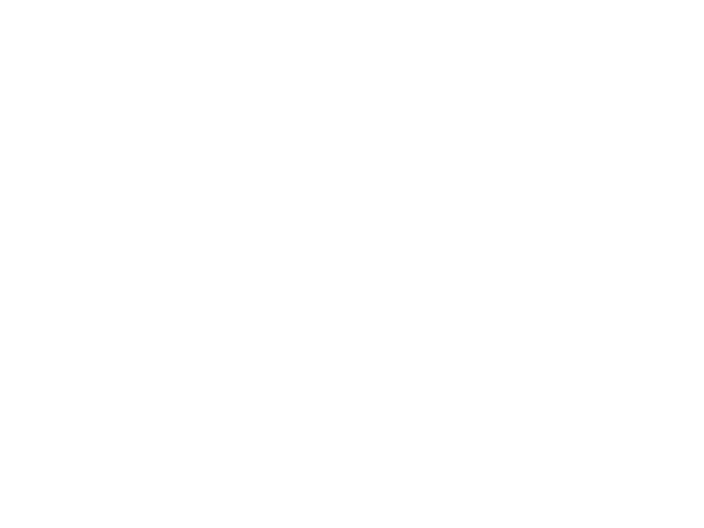

In [439]:
x1 = X[y1 == 1]
x2 = X[y1 == -1]


x_ = np.arange(-2, 4, 0.5)
y_ = np.arange(-2, 4, 0.5)
z_ = np.arange(-2, 4, 0.5)

xx, yy, zz= np.meshgrid(x_, y_, z_)
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = ada1.predict(all_dots)

a = all_dots[result == 1]
b = all_dots[result == -1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], marker='*')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], marker='*', color='red')

ax.scatter( a.T[0], a.T[1], a.T[2], alpha=0.1)
ax.scatter( b.T[0], b.T[1], b.T[2], alpha=0.1)

# Обучаем наши игровые нейроны

## Нейрон 1 - ada_win

####  Всегда хочет победить
#### Ставит всё на удачу
#### Ему всегда везеь 
#### Любит талисманы

In [440]:
X_win = np.array([
   
    [0,0,0], # -  
    [0,0,1], # -
    [0,1,0], # - 
    [0,1,1], # +
    [1,0,0], # -
    [1,0,1], # +
    [1,1,0], # +
     
    [0,0,-1], # - 
    [0,-1,0], # - 
    [0,-1,-1], # - 
    [-1,0,0], # - 
    [-1,0,-1], # - 
    [-1,-1,0], # - 
    
     [0,1,1], # +
     [1,1,0], # +
     [0,1,1], # +
     [1,1,0], # +
])
X_win = np.where(X_win==-1, 10, X_win)
X_win = np.where(X_win==0, -1, X_win)

y_win = np.array([
                  -1, -1, -1,
                  1, 
                  -1,
                 1,1,
                 -1,-1,-1, -1,-1,-1,
    
                   1,1,1,1
                 ])

X_win.shape[0] == y_win.shape[0]


True

<IPython.core.display.Javascript object>


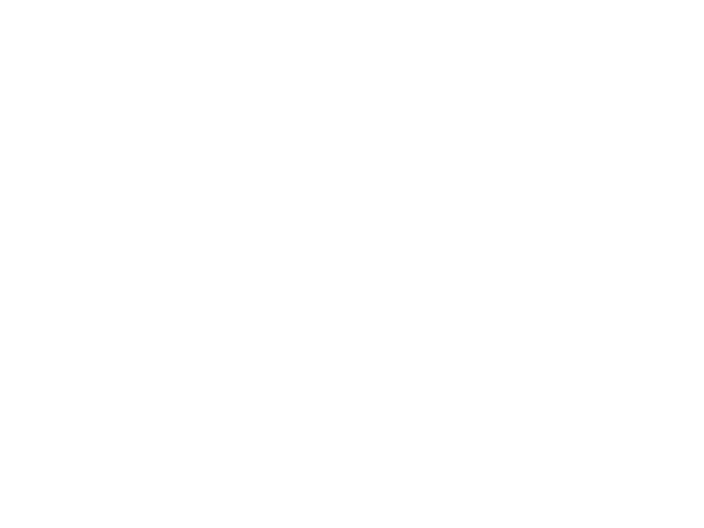

In [441]:
x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [442]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
    X_win, y_win, test_size=0.2, random_state = 1, stratify=y_win
)
X_test_win

array([[ 1,  1, -1],
       [10, -1, 10],
       [-1,  1,  1],
       [-1, 10, -1]])

In [443]:
ada_win = AdaLineGD( eta=0.001, n_iter=500, random_state=1)

In [444]:
ada_win.fit(X_train_win, y_train_win)
plt.plot(range(1 , len(ada_win.cost_) + 1 ), ada_win.cost_, marker='o')
plt.show()

In [445]:
ada_win.predict([1,2,1])

array(-1)

<IPython.core.display.Javascript object>


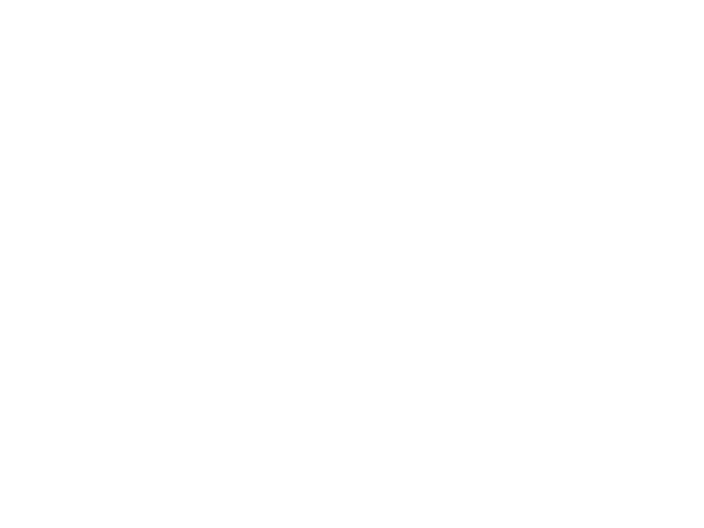

In [446]:
%matplotlib notebook

x_ = np.arange(-1, 11, 1)
y_ = np.arange(-1, 11, 1)
z_ = np.arange(-1, 11, 1)

xx, yy, zz= np.meshgrid(x_, y_, z_)
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = ada_win.predict(all_dots)

a = all_dots[result == 1 ]
b = all_dots[result == -1]


x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], color='darkgreen')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], color='red',alpha=0.5 )
#print(z)


ax.scatter( a.T[0], a.T[1], a.T[2], alpha=0.5)
ax.scatter( b.T[0], b.T[1], b.T[2], alpha=0.1)


In [447]:
from sklearn.svm import SVC 

In [448]:
svc_win = SVC(kernel='rbf', random_state=1, gamma=0.50, C=10.0)

In [449]:
svc_win.fit(X_train_win, y_train_win)


SVC(C=10.0, gamma=0.5, random_state=1)

In [450]:

svc_win.predict( [np.array([1,-1,1])]) 

array([1])

<IPython.core.display.Javascript object>


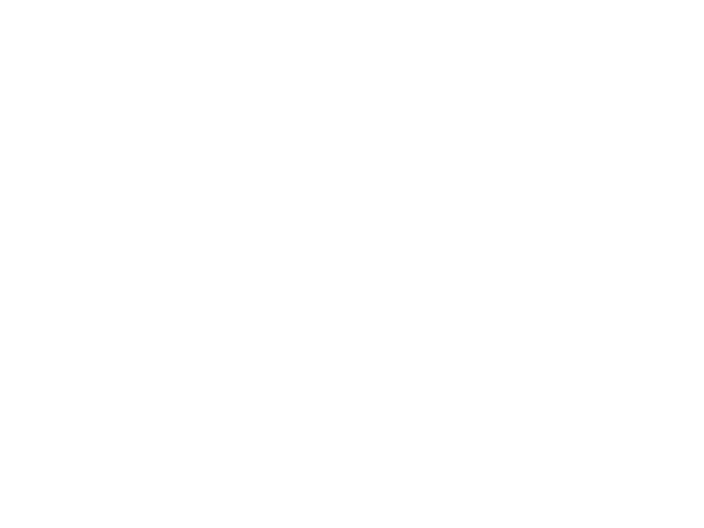

In [451]:
%matplotlib notebook

x_ = np.arange(-1, 11, 1)
y_ = np.arange(-1, 11, 1)
z_ = np.arange(-1, 11, 1)

xx, yy, zz= np.meshgrid(x_, y_, z_)
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T 
result = svc_win.predict(all_dots)

a = all_dots[result == 1 ]
b = all_dots[result == -1]


x1 = X_win[y_win == 1]
x2 = X_win[y_win == -1]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2], color='darkgreen')
ax.scatter(x2.T[0], x2.T[1],x2.T[2], color='red')
#print(z)


ax.scatter( a.T[0], a.T[1], a.T[2], alpha=0.5)
ax.scatter( b.T[0], b.T[1], b.T[2], alpha=0.1)


# ada_lose

In [452]:
X_lose = np.array([
    [0,0,0],
    [0,0,1],

    [0,1,1],

    [1,0,1],
    [1,1,0],
        
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1], #
    [-1,0,0],
    [-1,0,-1],#
    [-1,-1,0],#
    
    [-1,0,-1],#
    [-1,-1,0],#
    [0,-1,-1],#
    [-1,-1,0],#
    
     #[-1,0,-1],#
   # [-1,0,-1],#
    [-1,-1,0],#
    [-1,-1,0],#
    
    [0,1,-1],
    [-1,0,1],
    [1,-1,0],
    
    [1,0,-1],
    [-1,1,0],
    [0,-1,1],
])

X_lose = np.where(X_lose == -1, 10, X_lose)
X_lose = np.where(X_lose == 0, -1, X_lose)


y_lose = np.array([ -1, -1, -1, -1, -1, 
                    -1,  -1, 1,  -1, 1, 1,
                   1, 1, 1, 1, 1, 1, #1, #1,
                   -1, -1,-1,-1, -1, -1
])


<IPython.core.display.Javascript object>


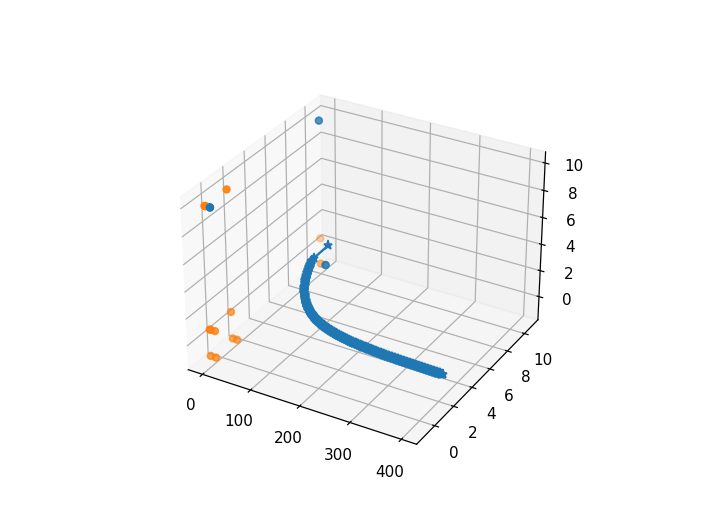

In [453]:
%matplotlib notebook


x1 = X_lose[y_lose == 1]
x2 = X_lose[y_lose == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [454]:
X_train_lose, X_test_lose, y_train_lose, y_test_lose = train_test_split(
X_lose, y_lose, test_size=0.1, random_state=1, stratify=y_lose
)

In [455]:
ada_lose = AdaLineGD (eta=0.001, n_iter=400, random_state=1)

In [456]:
ada_lose.fit(X_train_lose, y_train_lose)
plt.plot( range(1, len(ada_lose.cost_)+1), ada_lose.cost_, marker='*')

<IPython.core.display.Javascript object>


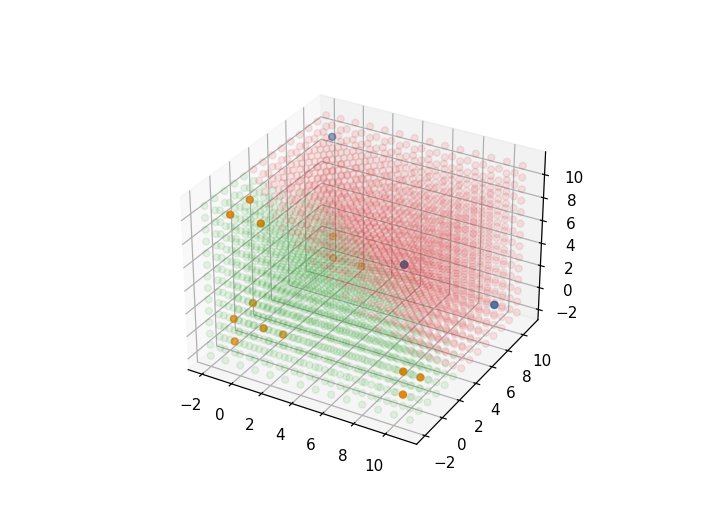

In [457]:
_x = np.arange(-2, 12)
_y = np.arange(-2, 12)
_z = np.arange(-2, 12)

xx, yy, zz = np.meshgrid( _x, _y, _z )
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T
result = ada_lose.predict(all_dots)

x1 = X_lose[y_lose == 1]
x2 = X_lose[y_lose == -1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1.T[0], x1.T[1], x1.T[2])
ax.scatter(x2.T[0], x2.T[1], x2.T[2])

c = all_dots[result == -1]
d = all_dots[result == 1]

ax.scatter(c.T[0], c.T[1], c.T[2], alpha=0.1)
ax.scatter(d.T[0], d.T[1], d.T[2], alpha=0.1)

In [458]:
svc_lose = SVC(kernel='rbf', random_state=1, gamma=0.02, C=1.0)

In [459]:
svc_lose.fit(X_train_lose, y_train_lose)

SVC(gamma=0.02, random_state=1)

<IPython.core.display.Javascript object>


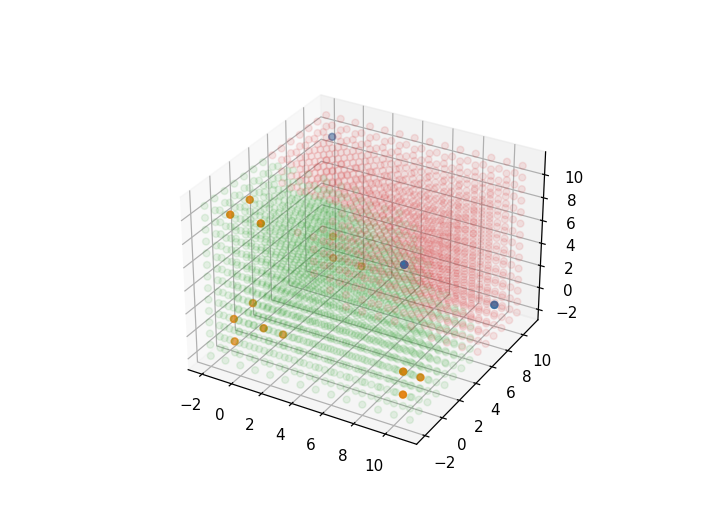

In [460]:
_x = np.arange(-2, 12)
_y = np.arange(-2, 12)
_z = np.arange(-2, 12)

xx, yy, zz = np.meshgrid( _x, _y, _z )
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T
result = svc_lose.predict(all_dots)

x1 = X_lose[y_lose == 1]
x2 = X_lose[y_lose == -1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1.T[0], x1.T[1], x1.T[2])
ax.scatter(x2.T[0], x2.T[1], x2.T[2])

c = all_dots[result == -1]
d = all_dots[result == 1]

ax.scatter(c.T[0], c.T[1], c.T[2], alpha=0.1)
ax.scatter(d.T[0], d.T[1], d.T[2], alpha=0.1)

# Нейрон ada_free:


In [461]:
X_free = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],

    
    [0,0,-1],
    [0,-1,0],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    
    
])

X_free = np.where(X_free == -1, 10, X_free)
X_free = np.where(X_free == 0, -1, X_free)


y_free = np.array([1,1,1,1,1,1,1,
                  -1,-1,-1,-1,-1,-1,-1,])
y_free.shape

(14,)

<IPython.core.display.Javascript object>


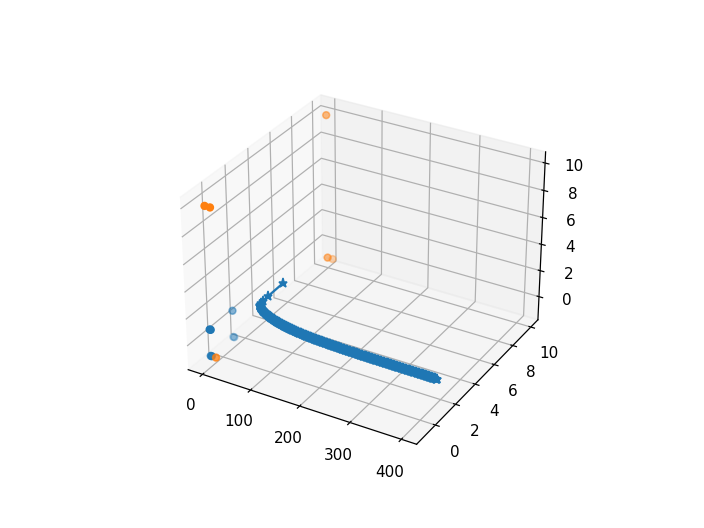

In [462]:

x1 = X_free[y_free == 1]
x2 = X_free[y_free == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [463]:
X_train_free, X_test_free, y_train_free, y_test_free = train_test_split(
X_free, y_free, test_size=0.1, random_state=1, stratify=y_free
)

In [464]:
ada_free = AdaLineGD (eta=0.001, n_iter=400, random_state=1)

In [465]:
ada_free.fit(X_train_free, y_train_free)
plt.plot( range(1, len(ada_free.cost_)+1), ada_free.cost_, marker='*')

<IPython.core.display.Javascript object>


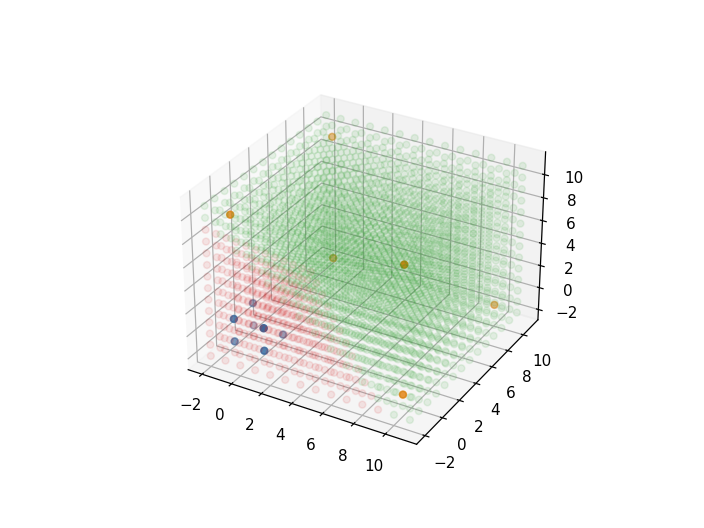

In [466]:
_x = np.arange(-2, 12)
_y = np.arange(-2, 12)
_z = np.arange(-2, 12)

xx, yy, zz = np.meshgrid( _x, _y, _z )
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T
result = ada_free.predict(all_dots)

x1 = X_free[y_free == 1]
x2 = X_free[y_free == -1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1.T[0], x1.T[1], x1.T[2])
ax.scatter(x2.T[0], x2.T[1], x2.T[2])

c = all_dots[result == -1]
d = all_dots[result == 1]

ax.scatter(c.T[0], c.T[1], c.T[2], alpha=0.1)
ax.scatter(d.T[0], d.T[1], d.T[2], alpha=0.1)

# Нейрон ada_zen:

In [467]:
X_zen = np.array([
    #[0,0,1],    
    [0,1,0],
    [0,1,1],
    [1,0,0],
    
    #[1,0,1],
    
    [1,1,0],
    
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    #[-1,-1,0],
    
    [-1, 0, 1],
    [1, 0, -1],
    [0, 1, -1],
    [0, -1, 1],
    [1,-1, 0],
    [-1, 1, 0],
    [0, 1, -1],
   [-1, 0, 1],
    [-1, 1, 0],
    [1, 0, -1],
    [0, 1, -1],
])
X_zen = np.where(X_zen == -1, 10, X_zen)
X_zen = np.where(X_zen == 0, -1, X_zen)

y_zen = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1,       # -1, -1, #-1, #-1
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
                 ])


<IPython.core.display.Javascript object>


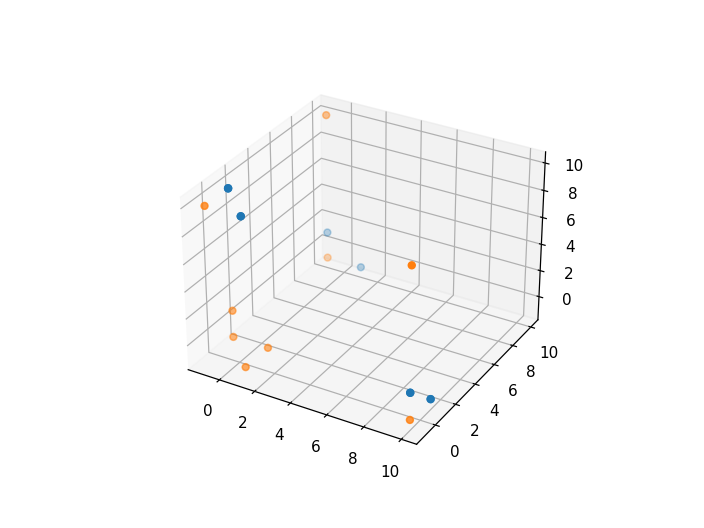

In [468]:
x1 = X_zen[y_zen == 1]
x2 = X_zen[y_zen == -1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.T[0], x1.T[1],x1.T[2])
ax.scatter(x2.T[0], x2.T[1],x2.T[2])

In [469]:
X_train_zen, X_test_zen, y_train_zen, y_test_zen = train_test_split(
X_zen, y_zen, test_size=0.1, random_state=1, stratify=y_zen
)

In [470]:
svc_zen = SVC(kernel='rbf', random_state=1, gamma=0.25, C=1.0)

In [471]:
svc_zen.fit(X_train_zen, y_train_zen)

SVC(gamma=0.25, random_state=1)

<IPython.core.display.Javascript object>


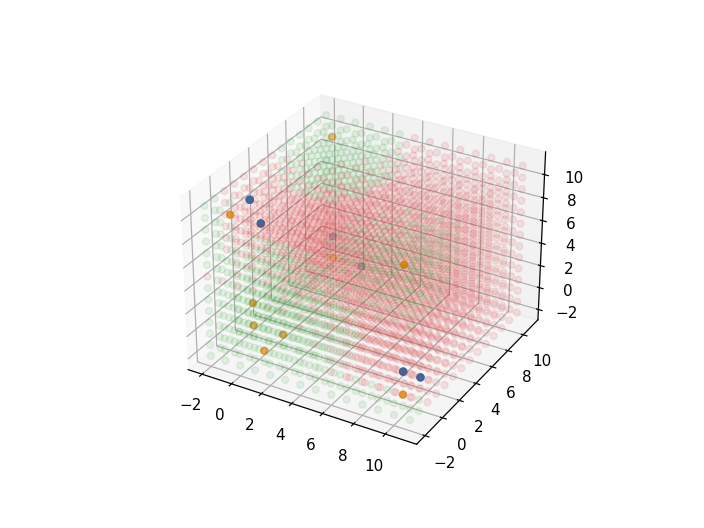

In [472]:
_x = np.arange(-2, 12)
_y = np.arange(-2, 12)
_z = np.arange(-2, 12)

xx, yy, zz = np.meshgrid( _x, _y, _z )
all_dots = np.array([xx.ravel(), yy.ravel(), zz.ravel()]).T
result = svc_zen.predict(all_dots)

x1 = X_zen[y_zen == 1]
x2 = X_zen[y_zen == -1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1.T[0], x1.T[1], x1.T[2])
ax.scatter(x2.T[0], x2.T[1], x2.T[2])

c = all_dots[result == -1]
d = all_dots[result == 1]

ax.scatter(c.T[0], c.T[1], c.T[2], alpha=0.1)
ax.scatter(d.T[0], d.T[1], d.T[2], alpha=0.1)

# Yes there in is

In [473]:
def grid(cnv, xstep, ystep, clr=(255, 0, 255)):
    cnv[::ystep, :] = clr
    cnv[:, ::xstep] = clr

In [474]:
def marked(X_pure, mark, x, y):
    
    X_pure[ 3*y + x] = mark
    return X_pure

In [475]:
def data_form(X):
    """
     Х - это поле крестиков ноликов, вытянутое в линию
     ф-я возвращает все возможные линии в нашем поле
     На вход линейный список входных значений
    """
    X_form = []
    X_form.append(X[:3])
    X_form.append(X[3:6])
    X_form.append(X[6:])

    X_form.append([X[0], X[3], X[6]])
    X_form.append([X[1], X[4], X[7]])
    X_form.append([X[2], X[5], X[8]])

    X_form.append([X[0], X[4], X[8]])
    X_form.append([X[2], X[4], X[6]])
    return X_form

data_form([i for i in range(0,9)])

[[0, 1, 2],
 [3, 4, 5],
 [6, 7, 8],
 [0, 3, 6],
 [1, 4, 7],
 [2, 5, 8],
 [0, 4, 8],
 [2, 4, 6]]

In [476]:
def draw_Ous (pos, step):
    x0 = int(step/2)
    y0 = int(step/2)
    
    dy = pos // 3
    dx = pos % 3
    cv2.circle(cnv, (x0 + step* dx, y0 + step* dy), x0, (255,0,0), 10)

# 0 1 2 - 3 4 5 - 6 7 8 

##  <u> 0 | 1 | 2 </u>
## <u> 3 | 4 | 5 </u>
##   6 | 7 | 8 

In [477]:
def predict(X):
    
    """
    На вход подается именно линейный массив
    """
    X_score_count = [1]* 9
    X_form = data_form(X) 
    # последовательность индесков
    list_order = [
        [0,1,2],
        [3,4,5],
        [6,7,8],
        [0,3,6],
        [1,4,7],
        [2,5,8],
        [2,4,6],
        [0,4,8]
    ]   
    for i, X_ in enumerate(X_form):
        X_ =np.array(X_)
        y_temp = [svc_win.predict(X_.reshape(1, -1)),
                  ada_lose.predict(X_),
                  ada_free.predict(X_),
                  svc_zen.predict(X_.reshape(1, -1))]
        print(y_temp)
        for ii in range(len(y_temp)):
            if (y_temp[ii]) < 0:
                y_temp[ii] = 0
        ada_pos = [ada1, ada2, ada3]
    
        for ind, pos in enumerate(list_order[i]):
            X_score_count[pos] *= (y_temp[0]*1000 +   y_temp[1]*10 +  y_temp[2]*3 +  y_temp[3]*1 ) * int(-1 != ada_pos[ind].predict(X_))
            #print(ada_pos[ind].predict(X_), "->", X_, pos)
    print('_________________')
    return X_score_count     

In [478]:
def draw(event, x, y, flags, param):
    x_ = x // 200
    y_ = y // 200
   
    x = x - x%200 + 1
    y = y - y%200 + 1
    power = 100
    try:
        if flags == 1:
            # cnv[y:199+y, x:x+199] = (0, 0, 0)
            cv2.line(cnv, (x + 10, y + 10), (x+199 - 10, y+199 - 10), (0, 255, 255), 10 )
            cv2.line(cnv, (x + 10 , y + 199 + 10), (x+199 - 10, y  + 10), (0, 255, 255), 10 )
            
            marked(X_pure,10 , int(x//200), int(y//200)  )
            
            #X_in[y_, x_] = 255
            
        #elif flags == 2:
        #    cnv[y:199+y, x:x+199] = (255, 255, 255)
        #    X_in[y_, x_] = 0
        if event == 4:
            score = predict(X_pure)
            max_score_index = score.index(max(score))
            draw_Ous (max_score_index, 200)
            X_pure[max_score_index] = 1
            #print(max_score_index , score)
    except:
        pass

In [ ]:
clr = np.array([0,0,0], dtype=np.uint8())
cnv = np.ones((600, 600, 3), dtype=np.uint8()) * clr
# Значения в каждой клеточке; -1 ничего, 1 крестик, 10 нолик
X_pure = [-1]* 9
X_pure [4] = 1
draw_Ous (4, 200)
predict(X_pure)
grid(cnv, 200, 200)

cv2.namedWindow('cnv')
cv2.setMouseCallback('cnv', draw)
while True:
    cv2.imshow('cnv', cnv)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()  

[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
_________________
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(-1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(-1), array([-1])]
[array([-1]), array(-1), array(-1), array([1])]
[array([-1]), array(-1), array(1), array([-1])]
_________________
[array([-1]), array(-1), array(-1), array([1])]
[array([-1]), array(-1), array(1), array([-1])]
[array([-1]), array(-1), array(-1), array([-1])]
[array([-1]), array(-1), array(1), array([-1])]
[